哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import numpy as np 
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_Taipei=pd.read_csv("A_lvr_land_A.csv")
df_New_Taipei=pd.read_csv("F_lvr_land_A.csv")
df_Taichung=pd.read_csv("B_lvr_land_A.csv")
df_Kaohsiung=pd.read_csv("E_lvr_land_A.csv")

D:\anaconda\envs\ML_class\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
for data in [df_Taipei,df_New_Taipei,df_Taichung,df_Kaohsiung]:
    data.drop(index=0,inplace=True)
df_Taipei

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,147825,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,文山區,房地(土地+建物),興隆路三段61~90號,15.78,其他,NaN,NaN,1090712,土地2建物1車位0,十層，電梯樓梯間,...,165025,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPPNMLSJRHPFFAA48DA,35.33,0.00,0.00,有
8838,文山區,房地(土地+建物),仙岩路16巷31~60號,10.57,其他,NaN,NaN,1090815,土地1建物1車位0,三層,...,127510,NaN,0.0,0,NaN,RPQNMLSJRHPFFAA58DA,17.82,2.88,0.00,有
8839,文山區,房地(土地+建物),興隆路三段255巷1~30號,13.78,其他,NaN,NaN,1090622,土地3建物1車位0,二層,...,128205,NaN,0.0,0,獨立產權公設未包含建物棟數內其他增建;,RPRNMLSJRHPFFAA68DA,20.20,5.22,0.01,有
8840,文山區,房地(土地+建物),興隆路三段207巷18弄1~30號,24.12,其他,NaN,NaN,1090626,土地1建物1車位0,三層,...,97157,NaN,0.0,0,陽台外推;,RPVNMLRJRHPFFAA98DA,67.47,0.00,14.11,無


In [10]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
for data,city_name in zip([df_Taipei,df_New_Taipei,df_Taichung,df_Kaohsiung],['Taipei','New_Taipei','Taichung','Kaohsiung']):
    data["city"]=city_name

In [13]:
#4. 將以上四份資料運用pd.concat()串接
df_data=pd.concat([df_Taipei,df_New_Taipei,df_Taichung,df_Kaohsiung],axis=0)
df_data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,四層,...,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.00,7.12,NaN,Kaohsiung
14130,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,十三層,...,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.00,NaN,Kaohsiung
14131,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,三層,...,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.00,NaN,Kaohsiung
14132,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,十層,...,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.00,7.89,0.00,NaN,Kaohsiung


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [14]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [16]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df_data.rename(columns=columns_mapping,inplace=True)
df_data

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,四層,...,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.00,7.12,NaN,Kaohsiung
14130,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,十三層,...,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.00,NaN,Kaohsiung
14131,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,三層,...,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.00,NaN,Kaohsiung
14132,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,十層,...,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.00,7.89,0.00,NaN,Kaohsiung


In [28]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df_analysis=df_data.loc[(df_data.main_use=="住家用")&(df_data.use_zoning=="住"), analysis_columns]
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Kaohsiung,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
12019,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
12236,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3
12284,Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [29]:
# 檢查訓練資料集中是否有遺失值 ?
def Missing_Counts( Data, NoMissing=True ) : 
    missing = Data.isnull().sum()  
    
    if NoMissing==False :
        missing = missing[ missing>0 ]
        
    missing.sort_values( ascending=False, inplace=True )  
    Missing_Count = pd.DataFrame( { 'Column Name':missing.index, 'Missing Count':missing.values } ) 
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['Missing Count'].apply( lambda x: '{:.2%}'.format(x/Data.shape[0] ))
    return  Missing_Count

Missing_Counts(df_analysis)

,Column Name,Missing Count,Percentage(%)
0,unit_price,16,0.20%
1,health_number,0,0.00%
2,hall_number,0,0.00%
3,room_number,0,0.00%
4,tx_dt,0,0.00%
5,main_building_area,0,0.00%
6,building_area_square_meter,0,0.00%
7,total_price,0,0.00%
8,use_zoning,0,0.00%
9,main_use,0,0.00%


In [32]:
df_analysis=df_analysis.dropna()
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Kaohsiung,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
12019,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
12236,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3
12284,Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [33]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 12492
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB


In [34]:
df_analysis=df_analysis.astype(columns_type,)

In [35]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 12492
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int32  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7802 non-null   int32  
 10  hall_number                 7802 non-null   int32  
 11  health_number               7802 non-null   int32  
dtypes: float64(3), int32(4), object(5)
memory usage: 670.5+ KB


In [40]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df_analysis['tx_dt_year']=df_analysis["tx_dt"].apply(lambda x:int(x[0:3]))
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109
12019,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109
12236,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109
12284,Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392.0,3,2,2,109


In [42]:
# 篩選條件
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
df_analysis=df_analysis.loc[(df_analysis.tx_dt_year==109)&(df_analysis.room_number >= 1)&(df_analysis.room_number < 6)&
                            (df_analysis.hall_number>=1)&(df_analysis.hall_number<3),df_analysis.columns]
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765.0,4,1,2,109
11925,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109
12019,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109
12236,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109


In [44]:
#最後運用.reset_index()重新定義索引
df_analysis.reset_index(drop=True,inplace=True)
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765.0,4,1,2,109
6890,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109
6891,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109
6892,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [46]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df_analysis['building_area_square_feet']=df_analysis['building_area_square_meter'].apply(lambda x : x*0.3025)
df_analysis['main_building_area_square_feet']=df_analysis['main_building_area'].apply(lambda x : x*0.3025)
df_analysis['unit_price_square_feet']=df_analysis['unit_price'].apply(lambda x :x/0.3025)
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765.0,4,1,2,109,24.327050,24.327050,147983.471074
6890,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109,42.383275,26.087600,125047.933884
6891,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109,43.789900,30.782400,115322.314050
6892,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109,63.760950,43.681000,42657.851240


In [49]:
#查看每個特徵的類型
num_features = []
cat_features = []

for dtype, feature in zip(df_analysis.dtypes,df_analysis.columns):
    if dtype == 'float64' or dtype=='int32' or dtype=='int64':
        num_features.append(feature)
    elif dtype == 'object':
        cat_features.append(feature)
    else:
        print( feature, 'is', df_analysis[feature].dtypes, 'type.' )
        
print( f'{len(num_features)} Numeric Features:\n {num_features}\n' )
print( f'{len(cat_features)} Category Features:\n {cat_features}' )

11 Numeric Features:
 ['total_price', 'building_area_square_meter', 'main_building_area', 'unit_price', 'room_number', 'hall_number', 'health_number', 'tx_dt_year', 'building_area_square_feet', 'main_building_area_square_feet', 'unit_price_square_feet']

5 Category Features:
 ['city', 'towns', 'main_use', 'use_zoning', 'tx_dt']


In [50]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df_analysis.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,109.0,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,0.0,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,109.0,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.0,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,109.0,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


In [57]:
#主建物面積坪最小值有0的
df_analysis=df_analysis[df_analysis["main_building_area"]!=0]
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765.0,4,1,2,109,24.327050,24.327050,147983.471074
6890,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109,42.383275,26.087600,125047.933884
6891,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109,43.789900,30.782400,115322.314050
6892,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109,63.760950,43.681000,42657.851240


### 移除後再用.describe()觀察是否還有奇怪的資料?



In [58]:
df_analysis.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.0,6854.000000,6854.000000,6.854000e+03
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,109.0,36.834942,24.976132,3.125569e+05
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,0.0,19.011854,11.174478,1.929742e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,109.0,25.111281,18.471406,1.771810e+05
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,109.0,33.095012,23.930775,2.636116e+05
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,109.0,44.602112,29.030925,3.929917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


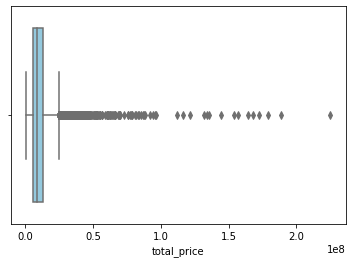

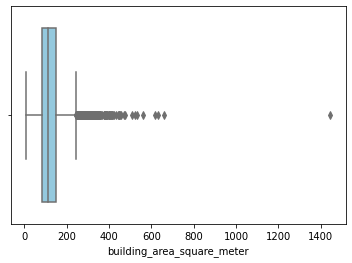

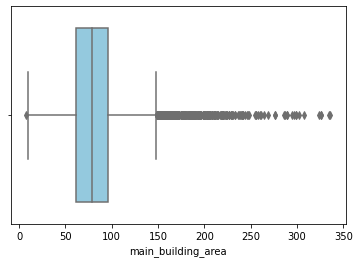

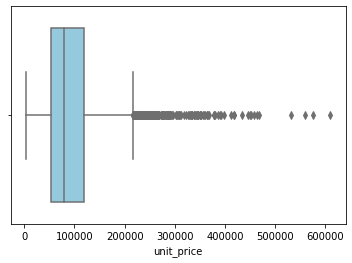

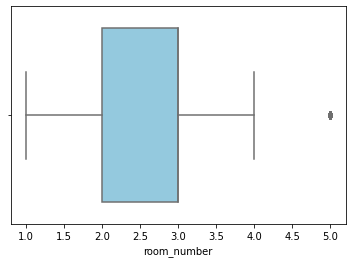

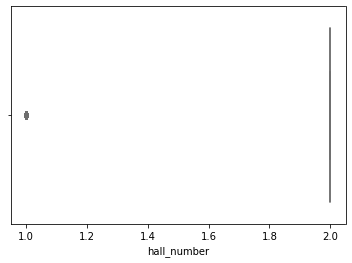

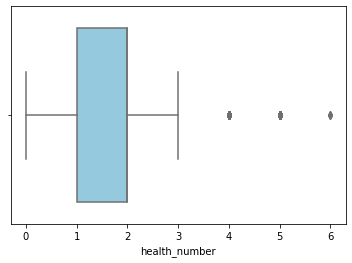

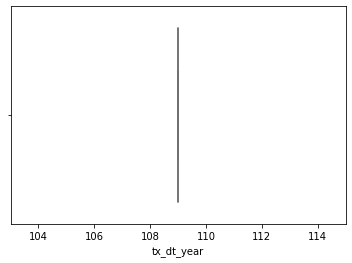

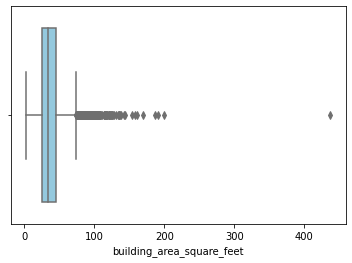

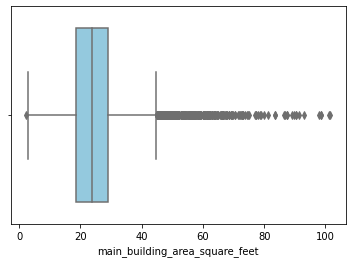

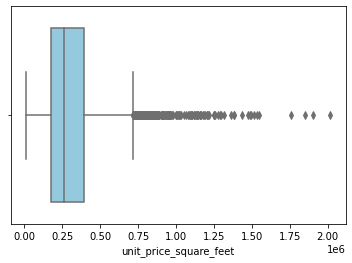

In [61]:
#離群值判斷：IQR

# 盒鬚圖
for f in [ i for i in num_features ]:
    sns.boxplot( x=df_analysis[f], whis=1.5, orient='h', color='skyblue' )
    plt.xlabel( f )
    plt.show()

In [62]:
over_1000_index = df_analysis.index[ df_analysis['building_area_square_meter']>1400 ]
print( '建物移轉總面積平方公尺(building_area_square_meter)有', len(over_1000_index), '筆資料超過 1400 平方公尺' )

over_300_index = df_analysis.index[ df_analysis['building_area_square_feet']>400 ]
print( '建物移轉總面積坪(building_area_square_feet)有', len(over_300_index), '筆資料超過 400 坪' )

df_analysis.loc[ over_1000_index ]

建物移轉總面積平方公尺(building_area_square_meter)有 1 筆資料超過 1400 平方公尺
建物移轉總面積坪(building_area_square_feet)有 1 筆資料超過 400 坪


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
5553,Taichung,龍井區,住家用,住,4680000,1444.95,73.54,1090529,3239.0,3,2,2,109,437.097375,22.24585,10707.438017


In [63]:
df_analysis.drop(over_1000_index[0],inplace=True)

In [64]:
over_2e8_index = df_analysis.index[ df_analysis['total_price']>2*(10**8) ]
print( '總價元(total_price)有', len(over_2e8_index), '筆資料超過 2 億元' )

df_analysis.loc[ over_2e8_index ]

總價元(total_price)有 1 筆資料超過 2 億元


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
749,Taipei,士林區,住家用,住,225000000,618.19,288.89,1090427,363966.0,4,2,5,109,187.002475,87.389225,1.203193e+06


In [65]:
# 移除總價元(total_price)超過 2 億元的資料
df_analysis.drop( over_2e8_index[0], inplace=True )


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [66]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
df_taipei_analysis=df_analysis[df_analysis['city']=="Taipei"]
df_taipei_analysis
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,Taipei,萬華區,住家用,住,17000000,100.07,68.12,1090611,169881.0,3,2,2,109,30.271175,20.606300,561590.082645
1374,Taipei,內湖區,住家用,住,20500000,137.05,85.30,1090605,149580.0,3,2,2,109,41.457625,25.803250,494479.338843
1375,Taipei,大安區,住家用,住,66500000,269.06,114.05,1090615,247157.0,2,2,4,109,81.390650,34.500125,817047.933884
1376,Taipei,信義區,住家用,住,14500000,102.90,91.69,1090531,140914.0,3,2,2,109,31.127250,27.736225,465831.404959


In [68]:
#列出關係矩陣
correlation=df_taipei_analysis.corr()
correlation

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
total_price,1.000000,0.862308,0.705892,0.582932,0.329024,0.277600,0.588484,NaN,0.862308,0.705892,0.582932
building_area_square_meter,0.862308,1.000000,0.833087,0.207651,0.488802,0.384049,0.692117,NaN,1.000000,0.833087,0.207651
main_building_area,0.705892,0.833087,1.000000,0.102358,0.636596,0.469032,0.652984,NaN,0.833087,1.000000,0.102358
unit_price,0.582932,0.207651,0.102358,1.000000,-0.103544,0.003756,0.118247,NaN,0.207651,0.102358,1.000000
room_number,0.329024,0.488802,0.636596,-0.103544,1.000000,0.509411,0.545231,NaN,0.488802,0.636596,-0.103544
hall_number,0.277600,0.384049,0.469032,0.003756,0.509411,1.000000,0.407677,NaN,0.384049,0.469032,0.003756
health_number,0.588484,0.692117,0.652984,0.118247,0.545231,0.407677,1.000000,NaN,0.692117,0.652984,0.118247
tx_dt_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
building_area_square_feet,0.862308,1.000000,0.833087,0.207651,0.488802,0.384049,0.692117,NaN,1.000000,0.833087,0.207651
main_building_area_square_feet,0.705892,0.833087,1.000000,0.102358,0.636596,0.469032,0.652984,NaN,0.833087,1.000000,0.102358


In [84]:
#找出時價登入總價(total_price)高度相關的變數
high_corr_1 = correlation[ ['total_price'] ].sort_values( by='total_price',  ascending=False )
high_corr_1[ high_corr_1['total_price']>0.7 ]

,total_price
total_price,1.000000
building_area_square_meter,0.862308
building_area_square_feet,0.862308
main_building_area,0.705892
main_building_area_square_feet,0.705892


In [85]:
# 時價登入中，與單價元坪(unit_price_square_feet)高度相關的變數
high_corr_2 = correlation[['unit_price_square_feet']].sort_values( by='unit_price_square_feet',  ascending=False )
high_corr_2[ high_corr_2['unit_price_square_feet']>0.7 ]

,unit_price_square_feet
unit_price,1.0
unit_price_square_feet,1.0


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

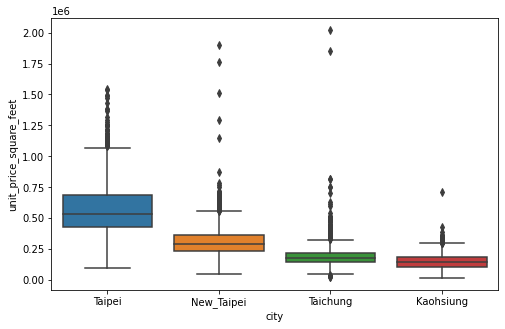

In [90]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
fig=plt.figure(figsize=(8,5))
sns.boxplot(x="city",y="unit_price_square_feet",data=df_analysis)
plt.xlabel("city")
plt.show()
#單價元坪(unit_price_square_feet)中位數最高的地區是Taipei

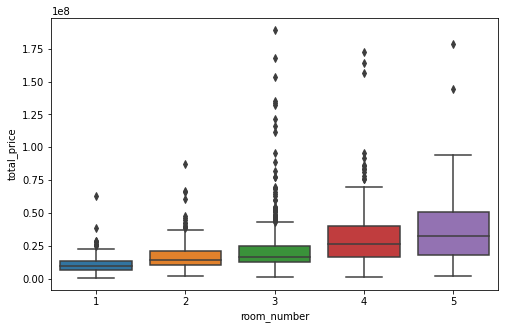

In [93]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
fig=plt.figure(figsize=(8,5))
sns.boxplot(x='room_number',y='total_price',data=df_taipei_analysis)
plt.xlabel("room_number")
plt.show()
#總價元(total_price)中位數最高的房間數為5間

In [99]:
#3. 對台北市的資料做圖，先將地區(towns)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
Taipei_town=df_taipei_analysis[["towns","unit_price_square_feet"]].copy()
Taipei_town["labels_towns"]=LabelEncoder().fit_transform(Taipei_town["towns"])
Taipei_town

,towns,unit_price_square_feet,labels_towns
0,文山區,517629.752066,9
1,文山區,494406.611570,9
2,文山區,488677.685950,9
3,文山區,212846.280992,9
4,文山區,241137.190083,9
...,...,...,...
1373,萬華區,561590.082645,11
1374,內湖區,494479.338843,3
1375,大安區,817047.933884,8
1376,信義區,465831.404959,2


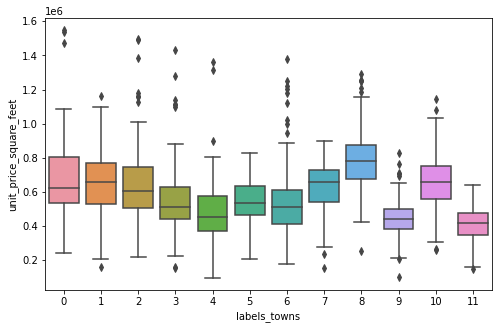

In [100]:
fig=plt.figure(figsize=(8,5))
sns.boxplot(x="labels_towns",y="unit_price_square_feet",data=Taipei_town)
plt.xlabel("labels_towns")
plt.show()
#單價元坪(unit_price_square_feet)中位數最高的地區為8號地區

In [105]:
le = LabelEncoder().fit(Taipei_town['towns'] )
print( '單價元坪(unit_price_square_feet)中位數最高的地區為', le.inverse_transform([8])[0] )

單價元坪(unit_price_square_feet)中位數最高的地區為 大安區


In [107]:
#運用.inverse_transform()反查編碼的地區
for i in np.arange(12):
    print( 'Label', i, ':', le.inverse_transform([i])[0] )

Label 0 : 中山區
Label 1 : 中正區
Label 2 : 信義區
Label 3 : 內湖區
Label 4 : 北投區
Label 5 : 南港區
Label 6 : 士林區
Label 7 : 大同區
Label 8 : 大安區
Label 9 : 文山區
Label 10 : 松山區
Label 11 : 萬華區
